# Linear Regression Multiple Variables 

In [1]:
#Movie Performance Gross Box Office regression
#install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import normalize

In [2]:
#Load the data
df = pd.read_csv("MoviePerM.csv")

In [3]:
#Check the data
df.head()

,ProfDU,user_rating,movie_length,Director Value,Producer Power,Star Power,estmated_budget,opening_weekend,grossboxoffice
0,1,3.6,93,2,2,2,10000000,1771,1433049
1,0,6.2,85,1,1,1,80000,3284,83500
2,1,7.0,92,2,2,2,5000000,4584,124720
3,1,5.5,92,2,2,2,450000,6722,54020
4,1,6.0,103,3,2,1,14000000,9128,75078


In [175]:
df.describe()

,ProfDU,user_rating,movie_length,Director Value,Producer Power,Star Power,estmated_budget,opening_weekend,grossboxoffice
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,4.810000e+02,4.810000e+02,4.810000e+02
mean,0.411642,6.120582,107.170478,2.563410,2.334719,2.588358,4.213948e+07,1.531480e+07,7.954263e+07
std,0.492643,1.202416,17.787520,0.783044,0.708740,0.883288,4.361920e+07,2.098824e+07,1.365347e+08
min,0.000000,1.700000,73.000000,1.000000,1.000000,1.000000,7.000000e+03,1.771000e+03,5.008000e+04
25%,0.000000,5.400000,95.000000,2.000000,2.000000,2.000000,1.100000e+07,1.443809e+06,8.704851e+06
50%,0.000000,6.300000,103.000000,2.000000,2.000000,3.000000,2.600000e+07,9.202815e+06,3.409964e+07
75%,1.000000,6.900000,117.000000,3.000000,3.000000,3.000000,6.000000e+07,2.036661e+07,9.477055e+07
max,1.000000,8.900000,183.000000,5.000000,5.000000,5.000000,3.000000e+08,1.584115e+08,1.001922e+09


Measuring Linear association, numbers closer to -1,1 indicate a strong linear relationship

In [360]:
#Me
from scipy.stats import pearsonr
# Correlation Coefficients
for column in ['ProfDU','user_rating','movie_length','Director Value','Producer Power','Star Power','estmated_budget','opening_weekend','grossboxoffice']:
    corr, _ = pearsonr(df[column], df['grossboxoffice'])
    print(f'Pearson correlation between {column} and dependent_variable: {corr}')

Pearson correlation between ProfDU and dependent_variable: -0.35950490819354836
Pearson correlation between user_rating and dependent_variable: 0.3010334651204096
Pearson correlation between movie_length and dependent_variable: 0.4290260213893229
Pearson correlation between Director Value and dependent_variable: 0.5092991615483684
Pearson correlation between Producer Power and dependent_variable: 0.276500039276953
Pearson correlation between Star Power and dependent_variable: 0.5040310209949754
Pearson correlation between estmated_budget and dependent_variable: 0.6374186525628296
Pearson correlation between opening_weekend and dependent_variable: 0.781334220136855
Pearson correlation between grossboxoffice and dependent_variable: 0.9999999999999996


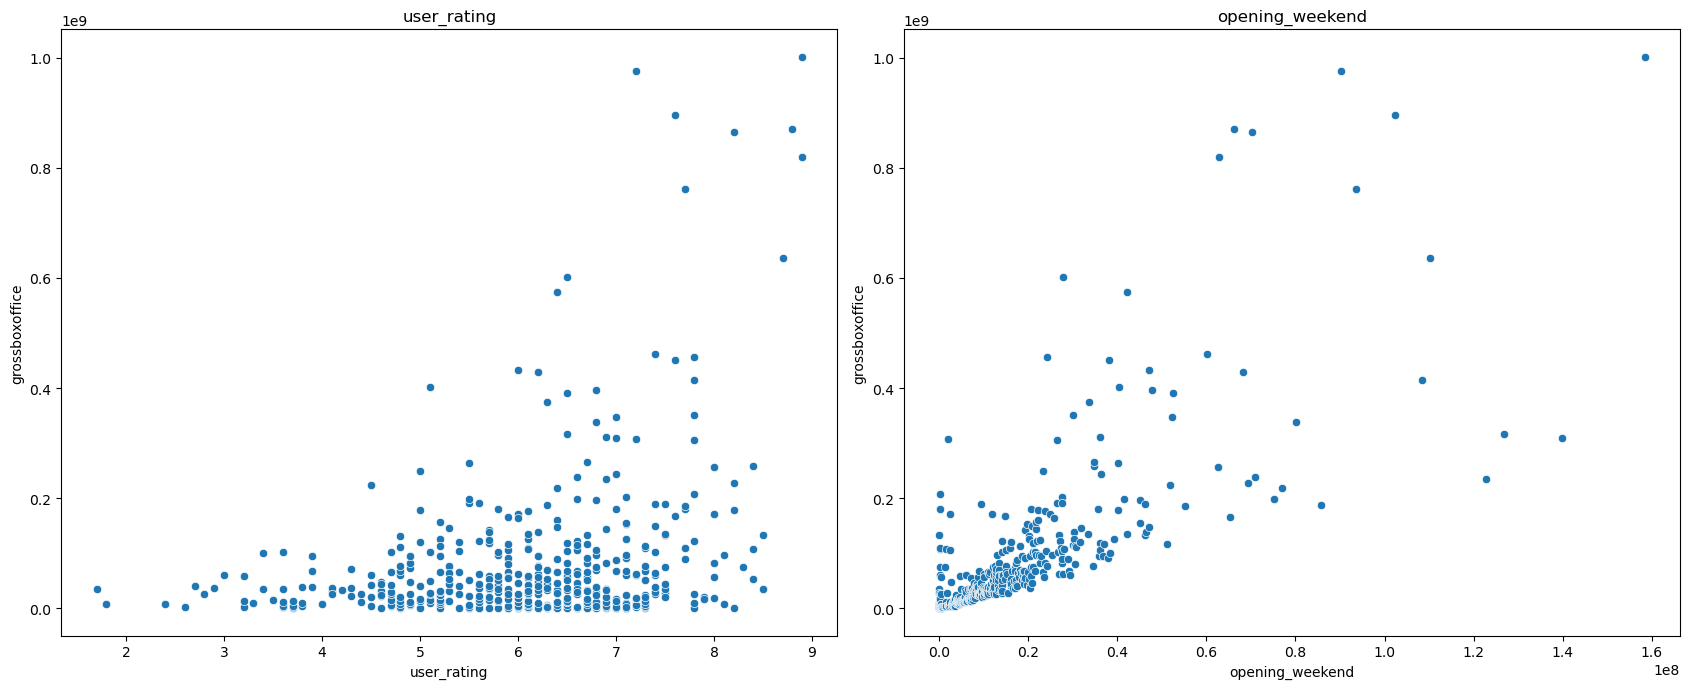

In [176]:
features = ['user_rating', 'opening_weekend']

# Create a figure and axes beforehand
fig, axs = plt.subplots(1, 2, figsize=(17, 7))  # 1 row, 2 columns


# Iterate over the features and the axes simultaneously
for col, ax in zip(features, axs):
    # Use the ax argument to specify where to plot
    sb.scatterplot(data=df, x=col, y='grossboxoffice', ax=ax)
    ax.set_title(col)  # Set title for each subplot


plt.tight_layout()  # Adjust layout to not overlap plots
plt.show()

####  Checking for Multicollinarity and if Polynomials/interactions terms are a better option
####  1 means no correlation, 1-5 moderate correlation, 5+ effects predictive power
#### VIF is (Variance Inflation Factor) 

In [356]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(df[['user_rating','opening_weekend','Star Power']])

# Getting feature names for the polynomial features
feature_names = poly.get_feature_names_out(['user_rating','opening_weekend','Star Power'])

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIFs
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(X_poly, i) for i in range(X_poly.shape[1])]
vif_df['feature'] = feature_names

In [358]:
vif_df

,VIF,feature
0,0.086834,user_rating
1,31.789221,opening_weekend
2,0.329019,Star Power
3,0.279570,user_rating^2
4,233.682281,user_rating opening_weekend
5,0.600836,user_rating Star Power
6,119.013930,opening_weekend^2
7,55.770453,opening_weekend Star Power
8,1.047736,Star Power^2
9,0.511026,user_rating^3


After checking different combonations, the below is the best fit

In [163]:
#define the x and y variables
x=df[['user_rating', 'opening_weekend']]
y=df[['grossboxoffice']]

In [164]:
#split the data into train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)

In [165]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (384, 2)
x_test (97, 2)
y_train (384, 1)
y_test (97, 1)


In [166]:
#Build the model sklearn
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [167]:
model.coef_

array([[1.55679767e+07, 4.85780701e+00]])

In [168]:
model.intercept_

array([-90783899.06475149])

In [169]:
# Predicting the Test set results
y_pred = model.predict(x_test)

You would typically plot the residuals after fitting your model to check for normality and homoscedasticity. For example:

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

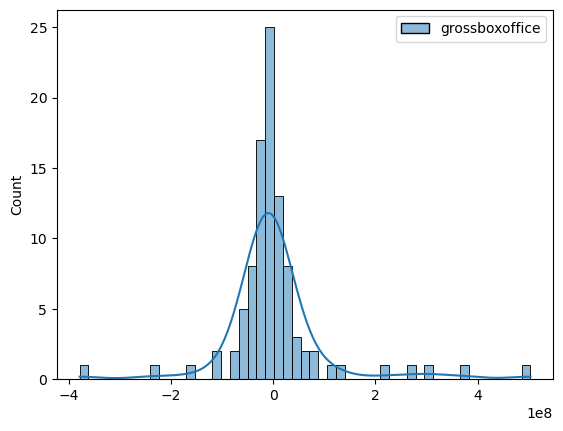

In [180]:
# Assume model is your fitted OLS model from statsmodels
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)  # For normality check
sns.scatterplot(y_pred, residuals)  # For homoscedasticity check

In [132]:
# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0064059678488272e+16


In [133]:
# Calculating the Root Mean Squared Error (MSE)
import math
rmse = math.sqrt(mse)
print ("RMSE - ", rmse)

RMSE -  100319787.07357922


In [134]:
# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print ("MAE - ", mae)

MAE -  51309076.58280758


In [135]:
# Calculating the Coefficient of Determination (R^2 Score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.5956568535670234


In [143]:
# Create a DataFrame with the specific values you want to test
model.predict([0,5,3000])


array([91816076.45788354])

Text(0, 0.5, 'Predicted')

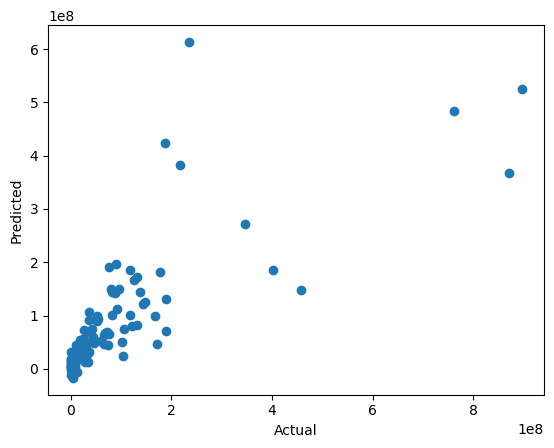

In [140]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='grossboxoffice'>

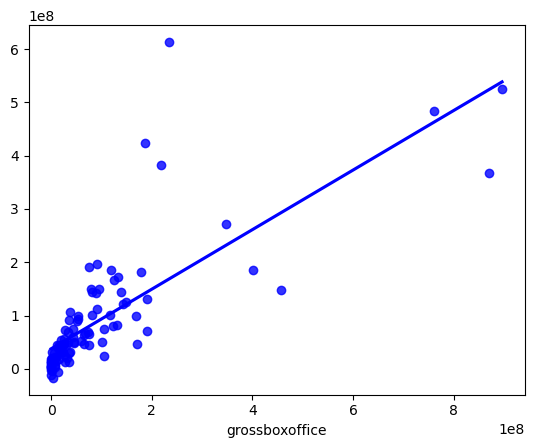

In [141]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='blue')

In [148]:
# create stastical summary.....
x = sm.add_constant(x)# Adds a constant term to the predictor
model = sm.OLS(y,x).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:         grossboxoffice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     417.1
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.52e-105
Time:                        15:05:05   Log-Likelihood:                -9449.3
No. Observations:                 481   AIC:                         1.890e+04
Df Residuals:                     478   BIC:                         1.892e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.077e+08   1.96e+07     

## Trying Lasso and Ridge

In [346]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train) 

Lasso()

In [347]:
yl_pred = lasso.predict(x_test)

In [348]:
# Calculating the Coefficient of Determination (R^2 Score)
r2 = r2_score(y_test, yl_pred)
print("R^2 Score:", r2)

R^2 Score: 0.6091798244634663


In [319]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)  # Assuming you have a train-test split 

Ridge()

In [320]:
yr_pred = ridge.predict(x_test)

In [321]:
# Calculating the Coefficient of Determination (R^2 Score)
r2 = r2_score(y_test, yr_pred)
print("R^2 Score:", r2)

R^2 Score: 0.6090994105666037


# Conclusion

Model = Poor

Issues = Multicollinearity, Weak R^2, No strong linear relationship.

Alternatives: Consider a different model, transform ordinal values (one-hot encode)